# Genetic algorithm
### Carl Fredrik Berg, NTNU, 2023

In this section we will consider the <i>genetic</i> algorithm, an optimization algorithm inspired by natural selection, thereby its name. This is a population based metaheuristic algorithm that mimics the Darwinian theory of survival of the fittest. It is an evolutionary algorithm, iteratively updating individuals in the population to converge towards an optimal solution. The individuals are represented by chromosomes, a string of genes, represented as a vector of genes, where these genes could be binary (true or false), discrete (subset of $\mathbb{Z}$) or continuous values (subset of $\mathbb{R}$). The evolution typically starts from by generating a population of randomly generated individuals. Along with the nature inspired names, each iteration is often called a generation. For each generation the fitness of each individual is assessed. The fitness function evaluating the individuals can be of different forms, but is often merely the objective function to be optimized.

These solution candidates (that is, the tested chromosomes) are points in the solution space, and for each generation (iteration) they are updated according to algorithms that are inspired by how nature are selecting the next generation in a population. This involves ranking the individuals according to the fitness of their solution, with the most fit candidates being most likely to breed and pass on their genes to the next generation. In the <i>selection</i> process the best individuals can be selected to pass on their genes unaltered. Creating off-springs by breeding is called <i>cross-over</i>, where random sections of the parents genes are merged to create a new gene. In addition, to ensure enough diversity in the gene-pool, it is common to include <i>mutations</i>, where either parts of the gene is altered randomly, or a completely new random gene is introduced. The algorithm terminates when the best solution candidate have a fitness above a certain pre-described cut-off value, or if the number of iterations are above a pre-described maximum number of iterations.

## Pseudo-code

Note that there are many variants of the genetic algorithm. Before presenting a Python code for one such variant, we will first describe the pseudo-code. The pseudo-code is general enough for it to represent different types of implementations, with the following Python code being one such implementation.

Let $f \colon \mathbb{R}^n \to \mathbb{R}$ be the function we want to optimize (in our case, maximize). Let $P$ be the population, with $\vec{p}_i$ being the best known position for particle $i \in I$ and $\vec{g}$ being the best known position of the full population. A pseudo-code for the algorithm is as follows:

1. <i>Initialization:</i> Initialize your population of individuals with a set of genes $\vec{x}_i$, where the subscript $i$ represents individual $i \in P$ in the population $P$. The initial population can be distributed randomly or by any other sampling method (e.g., the Latin hypercube sampling). We also rank our solutions according to their fitness, in our case we rank them then according to their values $f(\vec{x}_i)$.
2. <i>Selection:</i> One might keep the best individuals, to ensure that the best value do not deteriorate. One can also add small noise to a subset of the best individuals, as this will improve the local search. This is particularly important late in the search when one is close to the optimal point.
3. <i>Mutation:</i> With a small probability, let part of the individual genes mutate. This is important to ensure variation in the gene-pool, needed to explore wider. Without mutation, one easily merge towards the current local optima.
4. <i>Cross-over:</i> Merge genes from parents, where parents are picked based on their fitness. There are several ways of picking parents, e.g., competition. In the following we pick parents with a probability relative to their fitness.
5. <i> Convergence:</i> Repeat step 2 to 4 until a fixed number of steps or until the improvement in the best solution start to converge.

There are a range of factors to tune this genetic algorithm. There are also a range of different ways of setting up the algorithm, e.g., you do not need to include all the steps above.

Below we have implement the genetic algorithm in python.


1 [1.         0.78037506 0.71082168] 0.26931774382452434 -3.7130862073891286
2 [1.         0.89017465 0.71082168] 0.4612973684329489 -2.1677990563810323
3 [1.         0.89017465 0.71082168] 0.4612973684329489 -2.1677990563810323
4 [1.         0.89017465 0.71082168] 0.4612973684329489 -2.1677990563810323
5 [1.         0.89017465 0.71082168] 0.4612973684329489 -2.1677990563810323
6 [1.         0.89017465 0.71082168] 0.4612973684329489 -2.1677990563810323
7 [1.         0.89017465 0.71082168] 0.4612973684329489 -2.1677990563810323
8 [1.         0.89017465 0.71082168] 0.4612973684329489 -2.1677990563810323
9 [1.         0.89017465 0.71082168] 0.4612973684329489 -2.1677990563810323
10 [1.         0.89017465 0.71082168] 0.4612973684329489 -2.1677990563810323
11 [1.         0.89017465 0.71082168] 0.4612973684329489 -2.1677990563810323
12 [1.         0.89017465 0.71082168] 0.4612973684329489 -2.1677990563810323
13 [1.         0.89017465 0.71082168] 0.4612973684329489 -2.1677990563810323
14 [1. 

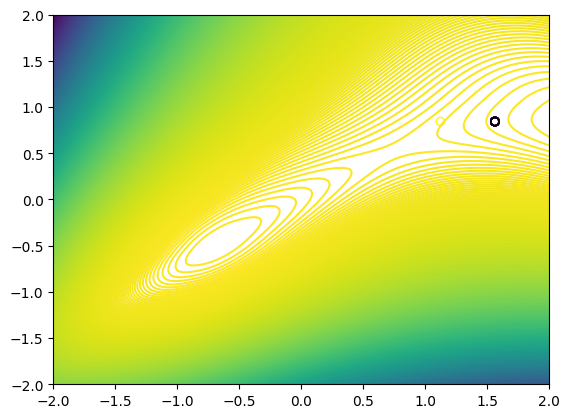

In [1]:
import numpy as np
from random import random
import matplotlib.pyplot as plt

cmap = plt.get_cmap('gnuplot')


def hObjectiveFunction(fx,fy):
    return -np.abs((3 - fx)*fx-3*fy+1.0)**(7.0/3.0)-np.abs((3-fy)*fy-fx+1.0)**(7.0/3.0)

afBounds=np.array([[-2.0,2.0],[-2.0,2.0]])
def hScalingFunction(fx,fy):
    #return (fx-afBounds[0,0])/(afBounds[0,1]-afBounds[0,0]),(fy-afBounds[1,0])/(afBounds[1,1]-afBounds[1,0])
    return afBounds[0,0]+fx*(afBounds[0,1]-afBounds[0,0]),afBounds[1,0]+fy*(afBounds[1,1]-afBounds[1,0])


def hFitnessFunction(fx,fy):
    return -1.0/hObjectiveFunction(hScalingFunction(fx,fy)[0],hScalingFunction(fx,fy)[1])



fDelta = 0.025
aafy, aafx = np.mgrid[slice(-2.0, 2.0 + fDelta, fDelta),slice(-2.0, 2.0 + fDelta, fDelta)]
plt.contour(aafx, aafy, hObjectiveFunction(aafx,aafy),1000)#, cmap=cm.Purples_r)

def plotBest(fx,fy,iIteration):
    plt.scatter(hScalingFunction(fx,fy)[0],hScalingFunction(fx,fy)[1],facecolors='none', edgecolors=cmap(1.0-iIteration/iMaxIt),)
    return None

#Set population size
iPopNum=10
#Set size of selection
iSelection=4
#Set propability of mutation
fMutProp=0.1
fMutProp=0.0
#Set noise
fNoise=0.02
fNoise=0.0

#Set convergence criteria
iMaxIt=100
iMaxIt=100
fMaxFitness=1E5
fCurFitness=0

#Initialize population
aaPopulation=np.random.uniform(0.0,1.0,(iPopNum,2))

#print(aaPopulation)
#print("shape: ", aaPopulation.shape)
#print("====================================")

aRankedPopulation=aaPopulation

iteration=0
while iteration<iMaxIt and fCurFitness<fMaxFitness:
    iteration+=1

    #Rank population according to fitness
    aRankedPopulation=[]
    for ii in range(0,iPopNum):
        aRankedPopulation.append((hFitnessFunction(aaPopulation[ii,0],aaPopulation[ii,1]) \
                                  ,aaPopulation[ii,0],aaPopulation[ii,1]))
    aRankedPopulation=np.asarray(aRankedPopulation)
    
    #print(aRankedPopulation)
    #print("shape:",aRankedPopulation.shape)
    #print("==============================")
    
    #print(aRankedPopulation[:,0])
    #print("shape: ", aRankedPopulation[:,0].shape)
    #print("===========================")

    
    aRankedPopulation=aRankedPopulation[aRankedPopulation[:,0].argsort()]
    
    #print(aRankedPopulation)
    #print("shape:",aRankedPopulation.shape)
    #print("==============================")
    
    aRankedPopulation[:,0]=aRankedPopulation[:,0]/np.sum(aRankedPopulation[:,0])
    aRankedPopulation[:,0]=np.cumsum(aRankedPopulation[:,0])
    
    #print(aRankedPopulation)
    #print("shape:",aRankedPopulation.shape)
    #print("==============================")
    
    #Print and plot current best solution
    fx=aRankedPopulation[-1,1]
    fy=aRankedPopulation[-1,2]
    print(iteration,aRankedPopulation[-1],hFitnessFunction(fx,fy), \
          hObjectiveFunction(hScalingFunction(fx,fy)[0],hScalingFunction(fx,fy)[1]))
    fCurFitness=hFitnessFunction(fx,fy)
    plotBest(fx,fy,iteration)

    #Create new population
    aaPopulation=[]

    #Keep best individual
    aaPopulation.append([aRankedPopulation[-1][1],aRankedPopulation[-1][2]])

    #Small variations to a selection
    for ii in range(1,iSelection):
        aaPopulation.append([max(0.0,min(1.0,aRankedPopulation[-ii][1]* \
                                         (1+2*fNoise*random()-fNoise))), \
                             max(0.0,min(1.0,aRankedPopulation[-ii][2]*(1+2*fNoise*random()-fNoise)))])
        
        #print("*******************")
        #print(aaPopulation)
        #print("===================")
    
    
    for ii in range(iSelection,iPopNum):
#    for ii in range(1,iPopNum):
        #Create parents based on fitness
        genePar1=max(0.0,min(1.0,aRankedPopulation[aRankedPopulation[:,0]>random()][0,1] \
                             *(1+2*fNoise*random()-fNoise)))
        genePar2=max(0.0,min(1.0,aRankedPopulation[aRankedPopulation[:,0]>random()][0,2] \
                             *(1+2*fNoise*random()-fNoise)))
        if(random()>(1-fMutProp)):#Mutation gene 1
            aaPopulation.append([random(),genePar2])
        else:
            if(random()>(1-fMutProp)):#Mutation gene 2
                aaPopulation.append([genePar1,random()])
            else:#Normal cross-over
                #Cross-over
                aaPopulation.append([genePar1,genePar2])

    aaPopulation=np.asarray(aaPopulation)
    #print("*******************")
    #print(aaPopulation)
    #print("===================")

plt.show()